In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import torch

# Load and clean the data
data = pd.read_csv("/home/mw/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3/adult.csv")
data = data.dropna()
print(data.columns)
data.columns = data.columns.str.strip()
data.head()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [38]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Apply one-hot encoding for categorical columns
for col in categorical_columns:
    if data[col].nunique() <= 2:
        data[col] = LabelEncoder().fit_transform(data[col])
    else:
        one_hot = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data.drop(col, axis=1), one_hot], axis=1)

boolean_columns = data.select_dtypes(include='bool').columns
data[boolean_columns] = data[boolean_columns].astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
data.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_?', 'workclass_Federal-gov',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=108)

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import spectral_norm

# ===================== Enhanced Multi-Head Self-Attention =====================
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embed dimension must be divisible by number of heads."
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size, seq_length, embed_dim = x.size()

        Q = self.query(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)

        # Attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) * self.scale
        attention_weights = torch.softmax(scores, dim=-1)

        # Attention output
        attention_output = torch.matmul(attention_weights, V)
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_length, embed_dim)
        return self.out(attention_output)

# ===================== Transformer Encoder Layer =====================
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout)

        self.fc = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        # Self-attention
        attn_output = self.self_attn(x)
        x = self.norm1(x + self.dropout1(attn_output))  # Residual connection

        # Feedforward
        ff_output = self.fc(x)
        x = self.norm2(x + self.dropout2(ff_output))  # Residual connection
        return x

# ===================== Encoder =====================
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=3, dropout=0.3):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.transformer_layers = nn.ModuleList([
            TransformerEncoderLayer(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.fc2 = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        for layer in self.transformer_layers:
            x = layer(x)
        return self.fc2(x.mean(dim=1))  # Mean pooling for latent representation

# ===================== Generator =====================
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=3, dropout=0.3):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.transformer_layers = nn.ModuleList([
            TransformerEncoderLayer(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x)).unsqueeze(1)  # Add sequence dimension
        for layer in self.transformer_layers:
            x = layer(x)
        x = self.fc2(x.squeeze(1))
        return self.sigmoid(x)

# ===================== Discriminator =====================
class Discriminator(nn.Module):
    def __init__(self, input_dim, dropout=0.3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            spectral_norm(nn.Linear(input_dim, 128)),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),
            spectral_norm(nn.Linear(128, 1))
        )

    def forward(self, x):
        return self.fc(x)

# ===================== WGAN-GP Loss =====================
def wgan_gp_loss(discriminator, real_data, fake_data, device):
    alpha = torch.rand(real_data.size(0), 1).to(device)
    interpolates = (alpha * real_data + (1 - alpha) * fake_data).requires_grad_(True)
    disc_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(
        outputs=disc_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(disc_interpolates),
        create_graph=True,
        retain_graph=True
    )[0]
    gradient_norm = gradients.view(gradients.size(0), -1).norm(2, dim=1)
    return ((gradient_norm - 1) ** 2).mean()

# ===================== Reconstruction Loss =====================
def reconstruction_loss(generated, real):
    mse_loss = nn.MSELoss()
    huber_loss = nn.SmoothL1Loss()
    return mse_loss(generated, real) + 0.7 * huber_loss(generated, real)  # Adjusted weight

# ===================== Optimizer and Scheduler =====================
def get_optimizer_and_scheduler(model, lr=0.0001, weight_decay=0.01, lr_scheduler=True):
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    if lr_scheduler:
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
        return optimizer, scheduler
    else:
        return optimizer

# ===================== Fine-tuning Pre-trained Models =====================
def fine_tune_model(pretrained_path, generator, encoder, discriminator, device):
    checkpoint = torch.load(pretrained_path)
    generator.load_state_dict(checkpoint['generator'])
    encoder.load_state_dict(checkpoint['encoder'])
    discriminator.load_state_dict(checkpoint['discriminator'])

    generator.to(device)
    encoder.to(device)
    discriminator.to(device)
    print("Pre-trained weights loaded and models fine-tuned.")


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler

# Updated Generator, Encoder, and Discriminator with more layers and attention mechanisms
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        # Using Transformer-like architecture for the Generator
        self.attn_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, dim_feedforward=ff_dim)
            for _ in range(num_layers)
        ])
        self.fc_in = nn.Linear(latent_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, z):
        x = self.fc_in(z)
        for layer in self.attn_layers:
            x = layer(x)
        return self.fc_out(x)

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4):
        super(Encoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.num_layers = num_layers

        # Transformer layers
        self.attn_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, dim_feedforward=ff_dim)
            for _ in range(num_layers)
        ])
        self.fc_in = nn.Linear(input_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, latent_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.fc_in(x)
        for layer in self.attn_layers:
            x = layer(x)
        return self.fc_out(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim=512):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc_out(x)

# Wasserstein Loss with Gradient Penalty
def wasserstein_loss(disc_real, disc_fake):
    return torch.mean(disc_real) - torch.mean(disc_fake)

def gradient_penalty(discriminator, real_data, fake_data, device):
    alpha = torch.rand(real_data.size(0), 1, 1).to(device)
    interpolates = (alpha * real_data + (1 - alpha) * fake_data).requires_grad_(True)
    disc_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(
        outputs=disc_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(disc_interpolates),
        create_graph=True,
        retain_graph=True
    )[0]
    gradient_norm = gradients.view(gradients.size(0), -1).norm(2, dim=1)
    return ((gradient_norm - 1) ** 2).mean()

# Updated training function
def train(data, latent_dim=100, epochs=1000, batch_size=128, lr=1e-4, patience=5, lambda_gp=10, save_path='enhanced_model.pth'):
    # Normalize and convert data to tensor
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.values)
    data = torch.tensor(data_scaled, dtype=torch.float32)

    # Create DataLoader for batching
    dataset = TensorDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize models
    generator = Generator(latent_dim, data.shape[1], num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4)
    encoder = Encoder(data.shape[1], latent_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4)
    discriminator = Discriminator(data.shape[1])

    # Move models to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)
    encoder.to(device)
    discriminator.to(device)

    # Define optimizers
    optimizer_gen = optim.AdamW(generator.parameters(), lr=lr, betas=(0.5, 0.9))
    optimizer_enc = optim.AdamW(encoder.parameters(), lr=lr, betas=(0.5, 0.9))
    optimizer_disc = optim.AdamW(discriminator.parameters(), lr=lr, betas=(0.5, 0.9))

    # Learning rate scheduler
    scheduler_gen = optim.lr_scheduler.StepLR(optimizer_gen, step_size=100, gamma=0.5)
    scheduler_enc = optim.lr_scheduler.StepLR(optimizer_enc, step_size=100, gamma=0.5)
    scheduler_disc = optim.lr_scheduler.StepLR(optimizer_disc, step_size=100, gamma=0.5)

    # Early stopping variables
    best_loss = float('inf')
    no_improvement_count = 0

    # Helper to save models
    def save_models():
        torch.save({
            'encoder': encoder.state_dict(),
            'generator': generator.state_dict(),
            'discriminator': discriminator.state_dict()
        }, save_path)
        print(f"Model improved! Saved to {save_path}")

    # Training loop
    for epoch in range(epochs):
        recon_loss_sum, disc_loss_sum = 0.0, 0.0

        for batch in dataloader:
            real_data = batch[0].to(device)

            # ========== Train Encoder and Generator ==========
            optimizer_enc.zero_grad()
            optimizer_gen.zero_grad()

            z_prior = torch.randn(real_data.size(0), latent_dim).to(device)
            real_data_seq = real_data.unsqueeze(1)
            z_encoded = encoder(real_data_seq)
            generated_data = generator(z_encoded).to(device)

            # Compute the VAE loss (reconstruction + MMD loss)
            recon_loss = nn.MSELoss()(generated_data, real_data_seq.squeeze(1))

            # Backpropagation and optimization
            recon_loss.backward()
            optimizer_enc.step()
            optimizer_gen.step()

            # ========== Train Discriminator ==========
            optimizer_disc.zero_grad()

            fake_data = generator(z_prior).detach()

            real_data_noisy = real_data + 0.01 * torch.randn_like(real_data).to(device)
            fake_data_noisy = fake_data + 0.01 * torch.randn_like(fake_data).to(device)

            disc_real = discriminator(real_data_noisy)
            disc_fake = discriminator(fake_data_noisy)

            disc_loss = wasserstein_loss(disc_real, disc_fake)
            gp = gradient_penalty(discriminator, real_data_noisy, fake_data_noisy, device)

            disc_loss = disc_loss + lambda_gp * gp
            disc_loss.backward()
            optimizer_disc.step()

            # Accumulate losses for logging
            recon_loss_sum += recon_loss.item()
            disc_loss_sum += disc_loss.item()

        # Average loss computation and logging
        avg_recon_loss = recon_loss_sum / len(dataloader)
        avg_disc_loss = disc_loss_sum / len(dataloader)

        print(f"Epoch [{epoch + 1}/{epochs}] | Recon Loss: {avg_recon_loss:.4f} | Disc Loss: {avg_disc_loss:.4f}")

        # Save the best model
        if avg_recon_loss < best_loss:
            best_loss = avg_recon_loss
            no_improvement_count = 0
            save_models()
        else:
            no_improvement_count += 1
            print(f"No improvement for {no_improvement_count} epoch(s).")

        # Early stopping
        if no_improvement_count >= patience:
            print("Early stopping triggered!")
            break

        # Update schedulers
        scheduler_gen.step()
        scheduler_enc.step()
        scheduler_disc.step()



In [69]:
train(data=data)


/home/mw/miniconda3/envs/sih/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([128, 108])) that is different to the input size (torch.Size([128, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/mw/miniconda3/envs/sih/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([49, 108])) that is different to the input size (torch.Size([49, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/1000] | Recon Loss: 1.0182 | Disc Loss: -0.3901
Model improved! Saved to enhanced_model.pth
Epoch [2/1000] | Recon Loss: 1.0073 | Disc Loss: -0.5122
Model improved! Saved to enhanced_model.pth
Epoch [3/1000] | Recon Loss: 1.0059 | Disc Loss: -0.5495
Model improved! Saved to enhanced_model.pth
Epoch [4/1000] | Recon Loss: 1.0052 | Disc Loss: -0.5702
Model improved! Saved to enhanced_model.pth
Epoch [5/1000] | Recon Loss: 1.0040 | Disc Loss: -0.5866
Model improved! Saved to enhanced_model.pth
Epoch [6/1000] | Recon Loss: 1.0020 | Disc Loss: -0.6046
Model improved! Saved to enhanced_model.pth
Epoch [7/1000] | Recon Loss: 1.0034 | Disc Loss: -0.6182
No improvement for 1 epoch(s).
Epoch [8/1000] | Recon Loss: 1.0005 | Disc Loss: -0.6329
Model improved! Saved to enhanced_model.pth
Epoch [9/1000] | Recon Loss: 0.9995 | Disc Loss: -0.6443
Model improved! Saved to enhanced_model.pth
Epoch [10/1000] | Recon Loss: 0.9995 | Disc Loss: -0.6560
Model improved! Saved to enhanced_model.pth
Ep

In [70]:
import torch

# Reinitialize the models with appropriate dimensions
latent_dim = 100  # Ensure this matches the latent_dim used during training
input_dim = data.shape[1]  # Number of features in your original dataset

generator = Generator(latent_dim, input_dim)
encoder = Encoder(input_dim, latent_dim)
discriminator = Discriminator(input_dim)  # Optional, if you need to use it

# Load the saved model
checkpoint = torch.load("enhanced_model.pth")
generator.load_state_dict(checkpoint['generator'])
encoder.load_state_dict(checkpoint['encoder'])
discriminator.load_state_dict(checkpoint['discriminator'])  # Optional

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
encoder = encoder.to(device)
discriminator = discriminator.to(device)  # Optional


/tmp/ipykernel_59890/1951013892.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("enhanced_model.pth")


In [71]:
# Generate random latent vectors (z_prior)
num_samples = 100  # Number of synthetic data points to generate
z_prior = torch.randn(num_samples, latent_dim).to(device)

# Generate synthetic data using the generator
synthetic_data = generator(z_prior).detach().cpu().numpy()

# print("Generated Data Shape:", synthetic_data)
print("8th Column of Generated Data:", synthetic_data[:10, 7])
print("8th column of real data",data.values[:10,7])


8th Column of Generated Data: [-0.00270245  0.01287162 -0.00234628  0.08117369  0.051907   -0.01949829
  0.03392714 -0.01768834 -0.00443054  0.03983378]
8th column of real data [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


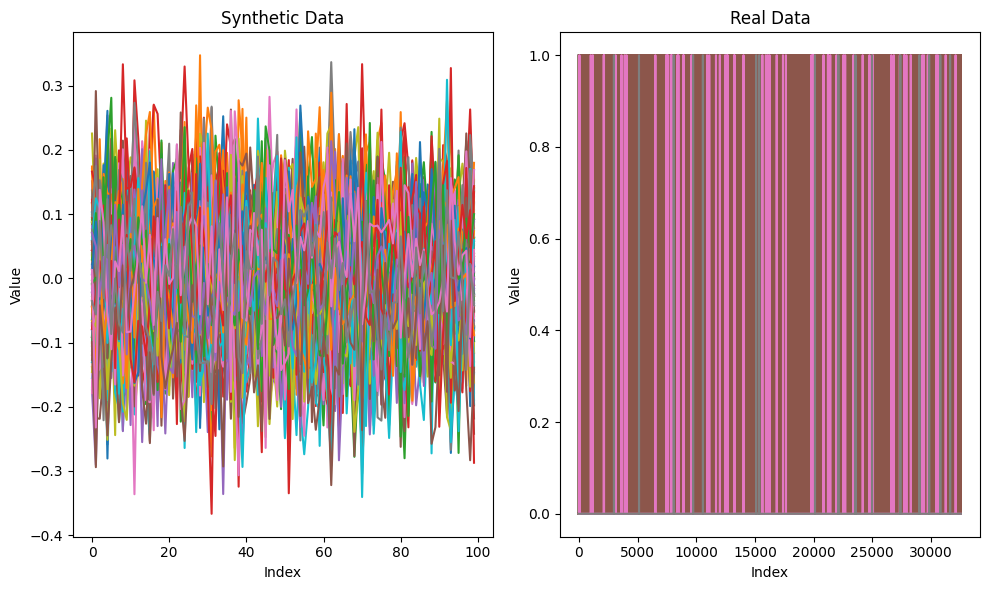

In [72]:
import matplotlib.pyplot as plt

# Assuming synthetic_data and real_data are your data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(data)
plt.title('Real Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# data = pd.read_csv('your_data.csv')
# synthetic_data = np.random.rand(1000, 108)

X_real_data = data.drop(columns=['income']).values
y_real_labels = data['income'].values

synthetic_data_copy = synthetic_data.copy()
synthetic_data_np = np.delete(synthetic_data_copy, 7, axis=1)
generated_data_np = np.vstack((X_real_data, synthetic_data_np))

synthetic_labels = synthetic_data[:, 7].copy()
synthetic_labels[synthetic_labels > 0.5] = 1
synthetic_labels[synthetic_labels <= 0.5] = 0
labels = np.concatenate((y_real_labels, synthetic_labels))

X_train, X_test, y_train, y_test = train_test_split(generated_data_np, labels, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8465


In [40]:
print(data.columns)

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_?', 'workclass_Federal-gov',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=108)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# data = pd.read_csv('your_data.csv')
# synthetic_data = np.random.rand(1000, 108)

X_real_data = data.drop(columns=['income']).values
y_real_labels = data['income'].values

synthetic_data_copy = synthetic_data.copy()
synthetic_data_np = np.delete(synthetic_data_copy, 7, axis=1)
generated_data_np = np.vstack((X_real_data, synthetic_data_np))

synthetic_labels = synthetic_data[:, 7].copy()
synthetic_labels[synthetic_labels > 0.5] = 1
synthetic_labels[synthetic_labels <= 0.5] = 0
labels = np.concatenate((y_real_labels, synthetic_labels))

X_train, X_test, y_train, y_test = train_test_split(generated_data_np, labels, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.8122


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# data = pd.read_csv('your_data.csv')
# synthetic_data = np.random.rand(1000, 108)

X_real_data = data.drop(columns=['income']).values
y_real_labels = data['income'].values

synthetic_data_copy = synthetic_data.copy()
synthetic_data_np = np.delete(synthetic_data_copy, 7, axis=1)
generated_data_np = np.vstack((X_real_data, synthetic_data_np))

synthetic_labels = synthetic_data[:, 7].copy()
synthetic_labels[synthetic_labels > 0.5] = 1
synthetic_labels[synthetic_labels <= 0.5] = 0
labels = np.concatenate((y_real_labels, synthetic_labels))

X_train, X_test, y_train, y_test = train_test_split(generated_data_np, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8501


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import spectral_norm

# ===================== Enhanced Multi-Head Self-Attention =====================
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embed dimension must be divisible by the number of heads."
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.output_projection = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size, seq_length, embed_dim = x.size()

        Q = self.query(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(x).view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) * self.scale
        attention_weights = torch.softmax(scores, dim=-1)

        attention_output = torch.matmul(attention_weights, V)
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_length, embed_dim)
        return self.output_projection(attention_output)


# ===================== Transformer Encoder Layer =====================
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.self_attention = MultiHeadSelfAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout)

        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.GELU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.self_attention(x)
        x = self.norm1(x + self.dropout1(attn_output))  # Residual connection

        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout2(ff_output))  # Residual connection
        return x


# ===================== Encoder =====================
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=3, dropout=0.3):
        super(Encoder, self).__init__()
        self.input_projection = nn.Linear(input_dim, hidden_dim)
        self.layers = nn.ModuleList([
            TransformerEncoderLayer(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.output_projection = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        x = torch.relu(self.input_projection(x))
        for layer in self.layers:
            x = layer(x)
        return self.output_projection(x.mean(dim=1))  # Mean pooling


# ===================== Generator =====================
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=3, dropout=0.3):
        super(Generator, self).__init__()
        self.latent_projection = nn.Linear(latent_dim, hidden_dim)
        self.layers = nn.ModuleList([
            TransformerEncoderLayer(hidden_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)
        ])
        self.output_projection = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.latent_projection(x)).unsqueeze(1)  # Add sequence dimension
        for layer in self.layers:
            x = layer(x)
        x = self.output_projection(x.squeeze(1))
        return self.activation(x)


# ===================== Discriminator =====================
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.3):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            spectral_norm(nn.Linear(input_dim, hidden_dim)),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),
            spectral_norm(nn.Linear(hidden_dim, 1))
        )

    def forward(self, x):
        return self.fc(x)


# ===================== WGAN-GP Loss =====================
def wgan_gp_loss(discriminator, real_data, fake_data, device):
    alpha = torch.rand(real_data.size(0), 1, 1).to(device)
    interpolates = (alpha * real_data + (1 - alpha) * fake_data).requires_grad_(True)
    disc_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(
        outputs=disc_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(disc_interpolates),
        create_graph=True,
        retain_graph=True
    )[0]
    gradient_penalty = ((gradients.view(gradients.size(0), -1).norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


# ===================== Reconstruction Loss =====================
def reconstruction_loss(pred, target):
    mse_loss = nn.MSELoss()
    huber_loss = nn.SmoothL1Loss()
    return mse_loss(pred, target) + 0.7 * huber_loss(pred, target)


# ===================== Optimizer and Scheduler =====================
def get_optimizer_and_scheduler(model, lr=0.0001, weight_decay=0.01, lr_scheduler=True):
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    if lr_scheduler:
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
        return optimizer, scheduler
    return optimizer


# ===================== Fine-tuning Pre-trained Models =====================
def load_pretrained_weights(pretrained_path, generator, encoder, discriminator, device):
    checkpoint = torch.load(pretrained_path)
    generator.load_state_dict(checkpoint['generator'])
    encoder.load_state_dict(checkpoint['encoder'])
    discriminator.load_state_dict(checkpoint['discriminator'])

    generator.to(device)
    encoder.to(device)
    discriminator.to(device)
    print("Pre-trained weights loaded successfully.")


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.tensorboard import SummaryWriter

def train(data, latent_dim=100, epochs=1000, batch_size=128, lr=1e-4, patience=5, lambda_gp=10, save_path='new_enhanced_model.pth'):
    # Normalize and convert data to tensor
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.values)
    data = torch.tensor(data_scaled, dtype=torch.float32)

    # Create DataLoader for batching
    dataset = TensorDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize models
    generator = Generator(latent_dim, data.shape[1], num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4)
    encoder = Encoder(data.shape[1], latent_dim, num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4)
    discriminator = Discriminator(data.shape[1])

    # Move models to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)
    encoder.to(device)
    discriminator.to(device)

    # Define optimizers
    optimizer_gen = optim.AdamW(generator.parameters(), lr=lr, betas=(0.5, 0.9))
    optimizer_enc = optim.AdamW(encoder.parameters(), lr=lr, betas=(0.5, 0.9))
    optimizer_disc = optim.AdamW(discriminator.parameters(), lr=lr, betas=(0.5, 0.9))

    # Learning rate scheduler
    scheduler_gen = optim.lr_scheduler.ReduceLROnPlateau(optimizer_gen, 'min', patience=10, factor=0.5)
    scheduler_enc = optim.lr_scheduler.ReduceLROnPlateau(optimizer_enc, 'min', patience=10, factor=0.5)
    scheduler_disc = optim.lr_scheduler.ReduceLROnPlateau(optimizer_disc, 'min', patience=10, factor=0.5)

    # Early stopping variables
    best_loss = float('inf')
    no_improvement_count = 0

    # Helper to save models
    def save_models():
        torch.save({
            'encoder': encoder.state_dict(),
            'generator': generator.state_dict(),
            'discriminator': discriminator.state_dict(),
            'optimizer_gen': optimizer_gen.state_dict(),
            'optimizer_enc': optimizer_enc.state_dict(),
            'optimizer_disc': optimizer_disc.state_dict()
        }, save_path)
        print(f"Model improved! Saved to {save_path}")

    # TensorBoard setup
    writer = SummaryWriter()

    # Training loop
    for epoch in range(epochs):
        recon_loss_sum, disc_loss_sum = 0.0, 0.0

        for batch in dataloader:
            real_data = batch[0].to(device)

            # ========== Train Encoder and Generator ==========
            optimizer_enc.zero_grad()
            optimizer_gen.zero_grad()

            z_prior = torch.randn(real_data.size(0), latent_dim).to(device)
            real_data_seq = real_data.unsqueeze(1)
            z_encoded = encoder(real_data_seq)
            generated_data = generator(z_encoded).to(device)

            # Compute reconstruction loss
            recon_loss = nn.MSELoss()(generated_data, real_data_seq.squeeze(1))

            # Optional: Add latent space regularization (e.g., MMD)
            mmd_loss = compute_mmd(z_encoded, z_prior)  # Implement this function if needed
            total_loss = recon_loss + 0.1 * mmd_loss  # 0.1 is the MMD weighting factor

            # Backpropagation and optimization
            total_loss.backward()
            optimizer_enc.step()
            optimizer_gen.step()

            # ========== Train Discriminator ==========
            for _ in range(5):  # Number of discriminator updates per generator update
                optimizer_disc.zero_grad()

                # Generate noisy data
                fake_data = generator(z_prior).detach()
                real_data_noisy = real_data + 0.01 * torch.randn_like(real_data).to(device)
                fake_data_noisy = fake_data + 0.01 * torch.randn_like(fake_data).to(device)

                # Discriminator outputs
                disc_real = discriminator(real_data_noisy)
                disc_fake = discriminator(fake_data_noisy)

                # Wasserstein loss and gradient penalty
                disc_loss = wasserstein_loss(disc_real, disc_fake)
                gp = gradient_penalty(discriminator, real_data_noisy, fake_data_noisy, device)
                disc_loss = disc_loss + lambda_gp * gp

                # Backpropagation and optimization
                disc_loss.backward()
                optimizer_disc.step()

            # Accumulate losses for logging
            recon_loss_sum += recon_loss.item()
            disc_loss_sum += disc_loss.item()

        # Average loss computation and logging
        avg_recon_loss = recon_loss_sum / len(dataloader)
        avg_disc_loss = disc_loss_sum / len(dataloader)

        print(f"Epoch [{epoch + 1}/{epochs}] | Recon Loss: {avg_recon_loss:.4f} | Disc Loss: {avg_disc_loss:.4f}")

        # TensorBoard logging
        writer.add_scalar('Loss/Generator', avg_recon_loss, epoch)
        writer.add_scalar('Loss/Discriminator', avg_disc_loss, epoch)
        writer.add_scalar('Learning Rate/Generator', optimizer_gen.param_groups[0]['lr'], epoch)

        # Save the best model
        if avg_recon_loss < best_loss:
            best_loss = avg_recon_loss
            no_improvement_count = 0
            save_models()
        else:
            no_improvement_count += 1
            print(f"No improvement for {no_improvement_count} epoch(s).")

        # Early stopping
        if no_improvement_count >= patience:
            print("Early stopping triggered!")
            break

        # Update schedulers
        scheduler_gen.step(avg_recon_loss)
        scheduler_enc.step(avg_recon_loss)
        scheduler_disc.step(avg_disc_loss)

    # Close TensorBoard writer
    writer.close()

def compute_mmd(x, y, sigma=1.0):
    """
    Compute the Maximum Mean Discrepancy (MMD) between two sets of samples using RBF kernel.

    Args:
        x (torch.Tensor): First set of samples (batch_size x latent_dim).
        y (torch.Tensor): Second set of samples (batch_size x latent_dim).
        sigma (float): The bandwidth parameter of the RBF kernel.

    Returns:
        torch.Tensor: The MMD value between x and y.
    """
    # RBF kernel function
    def rbf_kernel(x, y, sigma):
        # Compute pairwise squared Euclidean distances
        dist = torch.sum(x**2, 1).view(-1, 1) + torch.sum(y**2, 1) - 2 * torch.mm(x, y.t())
        return torch.exp(-dist / (2 * sigma ** 2))

    # Compute MMD^2 = E[K(x, x')] + E[K(y, y')] - 2 E[K(x, y')]
    xx_kernel = rbf_kernel(x, x, sigma)
    yy_kernel = rbf_kernel(y, y, sigma)
    xy_kernel = rbf_kernel(x, y, sigma)

    # Calculate MMD^2
    mmd_square = torch.mean(xx_kernel) + torch.mean(yy_kernel) - 2 * torch.mean(xy_kernel)

    return mmd_square


In [52]:
train(data=data)

Epoch [1/1000] | Recon Loss: 0.9214 | Disc Loss: 4.1539
Model improved! Saved to new_enhanced_model.pth
Epoch [2/1000] | Recon Loss: 0.8070 | Disc Loss: -0.3549
Model improved! Saved to new_enhanced_model.pth
Epoch [3/1000] | Recon Loss: 0.7791 | Disc Loss: -0.3644
Model improved! Saved to new_enhanced_model.pth
Epoch [4/1000] | Recon Loss: 0.7687 | Disc Loss: -0.3727
Model improved! Saved to new_enhanced_model.pth
Epoch [5/1000] | Recon Loss: 0.7610 | Disc Loss: -0.3822
Model improved! Saved to new_enhanced_model.pth
Epoch [6/1000] | Recon Loss: 0.7575 | Disc Loss: -0.3891
Model improved! Saved to new_enhanced_model.pth
Epoch [7/1000] | Recon Loss: 0.7554 | Disc Loss: -0.3937
Model improved! Saved to new_enhanced_model.pth
Epoch [8/1000] | Recon Loss: 0.7535 | Disc Loss: -0.3982
Model improved! Saved to new_enhanced_model.pth
Epoch [9/1000] | Recon Loss: 0.7519 | Disc Loss: -0.4005
Model improved! Saved to new_enhanced_model.pth
Epoch [10/1000] | Recon Loss: 0.7528 | Disc Loss: -0.401

In [61]:
import torch

# Define the same model architectures as before (Generator, Encoder, Discriminator)
# Assuming the same architecture code is available for these classes

def load_model(model, optimizer, model_path='new_enhanced_model.pth'):
    # Load the saved model checkpoint
    checkpoint = torch.load(model_path)

    # Load model weights
    model.load_state_dict(checkpoint['generator'])
    optimizer.load_state_dict(checkpoint['optimizer_gen'])
    print(f"Model loaded from {model_path}")
    return model, optimizer

# Assuming you have already defined the models (Generator, Encoder, Discriminator)
generator = Generator(latent_dim=100, output_dim=data.shape[1], num_heads=4, hidden_dim=256, ff_dim=512, num_layers=4)  # Adjust the parameters as needed
optimizer_gen = torch.optim.AdamW(generator.parameters(), lr=1e-4, betas=(0.5, 0.9))

# Load the generator model
generator, optimizer_gen = load_model(generator, optimizer_gen, model_path='new_enhanced_model.pth')

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)


Model loaded from new_enhanced_model.pth


/tmp/ipykernel_3564/77604147.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Generator(
  (latent_projection): Linear(in_features=100, out_features=256, bias=True)
  (layers): ModuleList(
    (0-3): 4 x TransformerEncoderLayer(
      (self_attention): MultiHeadSelfAttention(
        (query): Linear(in_features=256, out_features=256, bias=True)
        (key): Linear(in_features=256, out_features=256, bias=True)
        (value): Linear(in_features=256, out_features=256, bias=True)
        (output_projection): Linear(in_features=256, out_features=256, bias=True)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.3, inplace=False)
      (feed_forward): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=512, out_features=256, bias=True)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.3, inplace=False)
    )
  )
  (output_projection): Linear(in_features=256, 

In [62]:
import torch

# Assuming you're generating data with a latent dimension of 100
latent_dim = 100
num_samples = 100  # Specify how many samples you want to generate

# Set the model to evaluation mode
generator.eval()

# Generate latent vectors (random noise)
z_prior = torch.randn(num_samples, latent_dim).to(device)

# Generate synthetic data
with torch.no_grad():  # Disable gradient computation
    generated_data = generator(z_prior)

# Convert the generated data to CPU if it's on GPU and then convert to numpy
generated_data = generated_data.cpu().numpy()

print("Generated Data:")
print(generated_data)


Generated Data:
[[4.14353043e-01 2.62453973e-01 1.18144533e-04 ... 4.21382629e-06
  1.57898143e-02 5.73180223e-05]
 [8.72281730e-01 1.59855023e-01 1.83852334e-02 ... 2.83224974e-02
  1.27959088e-03 2.46621985e-05]
 [9.12090763e-03 1.97872743e-02 1.32947566e-03 ... 1.25139533e-02
  9.22341773e-04 1.83112100e-01]
 ...
 [5.73612988e-01 1.74870938e-02 2.76058298e-02 ... 3.41774360e-03
  7.15846327e-05 6.37198216e-04]
 [9.13737249e-03 7.47798920e-01 1.61603168e-02 ... 1.81032403e-04
  5.66435419e-03 8.05760145e-01]
 [1.09558925e-01 9.13316965e-01 1.97212488e-04 ... 8.33401177e-03
  3.06761086e-01 1.91867573e-03]]


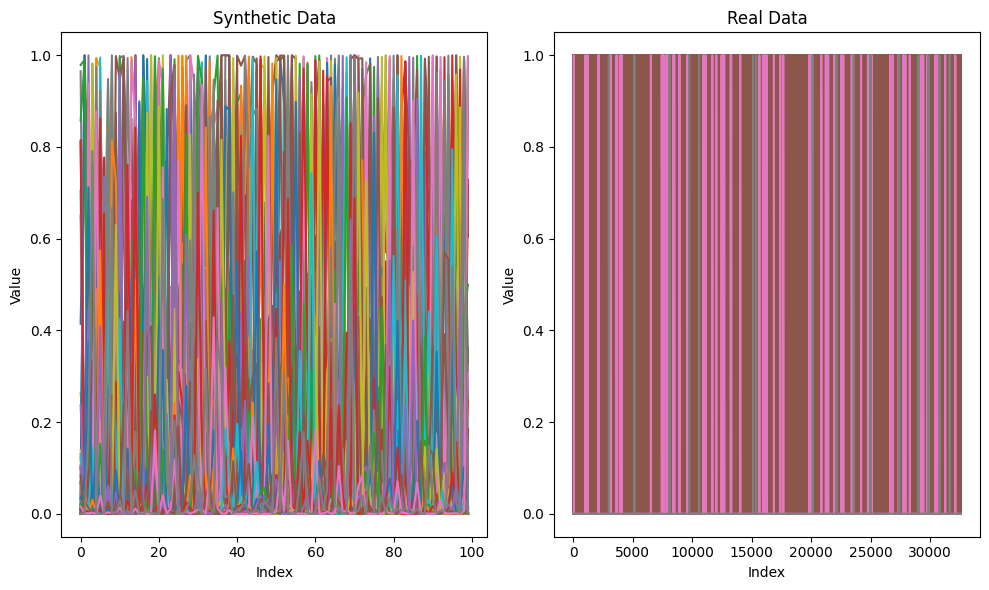

In [64]:
import matplotlib.pyplot as plt

# Assuming synthetic_data and real_data are your data
plt.figure(figsize=(10, 6))

# Detach the tensor from the computation graph and convert to numpy
synthetic_data = generated_data

plt.subplot(1, 2, 1)
plt.plot(synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Assuming 'data' is your real data, detach it as well if it's a tensor
real_data = data.values # If data is a tensor
plt.subplot(1, 2, 2)
plt.plot(real_data)
plt.title('Real Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# data = pd.read_csv('your_data.csv')
# synthetic_data = np.random.rand(1000, 108)
print(data.columns)
X_real_data = data.drop(columns=['income']).values
y_real_labels = data['income'].values

synthetic_data_copy = synthetic_data.copy()
synthetic_data_np = np.delete(synthetic_data_copy, 7, axis=1)
generated_data_np = np.vstack((X_real_data, synthetic_data_np))

synthetic_labels = synthetic_data[:, 7].copy()
synthetic_labels[synthetic_labels > 0.5] = 1
synthetic_labels[synthetic_labels <= 0.5] = 0
labels = np.concatenate((y_real_labels, synthetic_labels))

X_train, X_test, y_train, y_test = train_test_split(generated_data_np, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_?', 'workclass_Federal-gov',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=108)
Random Forest Accuracy: 0.8514
